In [1]:
%matplotlib inline

In [2]:
from pprint import pprint
from tqdm.notebook import trange
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#Create Environment
env = gym.make('ma-highway-v0')

#load Model
model = A2C.load('Training/Saved Models/best_model', env=env)

speed_metrics = []
position_metrics = []
for episode in trange(1, desc="Test episodes"):
    obs, done = env.reset(), False
    step = 1
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        position_metrics = info["position_metrics"]
        speed_metrics = info["speed_metrics"]
        step += 1
env.close()

c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to 

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\core.py:269: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


Test episodes:   0%|          | 0/1 [00:00<?, ?it/s]

## DLC Vehicle vs MLC Vehicle Avg Speed Comparison

In [6]:
import numpy as np
import matplotlib.pyplot as plt

speed_metrics_np = np.array(speed_metrics)
print(speed_metrics_np)

[[0.00000000e+00 2.09935379e+01 2.08376472e+01 2.11494286e+01]
 [1.00000000e+00 2.11326063e+01 2.08699348e+01 2.13952778e+01]
 [2.00000000e+00 2.12678117e+01 2.09013255e+01 2.16342979e+01]
 ...
 [1.79800000e+03 2.60000000e+01 2.20000000e+01 3.00000000e+01]
 [1.79900000e+03 2.60000000e+01 2.20000000e+01 3.00000000e+01]
 [1.80000000e+03 2.60000000e+01 2.20000000e+01 3.00000000e+01]]


In [11]:
#save np array as txt
np.savetxt("speed_metrics.txt", speed_metrics_np, delimiter=" ")

In [12]:
speed_metrics_np

array([[0.00000000e+00, 2.09935379e+01, 2.08376472e+01, 2.11494286e+01],
       [1.00000000e+00, 2.11326063e+01, 2.08699348e+01, 2.13952778e+01],
       [2.00000000e+00, 2.12678117e+01, 2.09013255e+01, 2.16342979e+01],
       ...,
       [1.79800000e+03, 2.60000000e+01, 2.20000000e+01, 3.00000000e+01],
       [1.79900000e+03, 2.60000000e+01, 2.20000000e+01, 3.00000000e+01],
       [1.80000000e+03, 2.60000000e+01, 2.20000000e+01, 3.00000000e+01]])

In [13]:
#divide numpy into individual lists

time_steps = speed_metrics_np[:, 0]
avg_mlc_speed = speed_metrics_np[:, 2]
avg_dlc_speed = speed_metrics_np[:, 3]
print(avg_mlc_speed)
avg_mlc_speed.shape

[20.83764722 20.8699348  20.9013255  ... 22.         22.
 22.        ]


(1801,)

In [14]:
import pandas as pd

data = {'Time Steps(sec)': time_steps[:50],
        'Avg MLC Speed(m/s)': avg_mlc_speed[:50],
        'Avg DLC Speed(m/s)': avg_dlc_speed[:50]}
speed_metrics_df = pd.DataFrame(data)

In [28]:
speed_metrics_df.tail()

,Time Steps(sec),Avg MLC Speed(m/s),Avg DLC Speed(m/s)
45,45.0,21.672819,27.508730
46,46.0,21.681908,27.577932
47,47.0,21.690744,27.645212
48,48.0,21.699334,27.710623
49,49.0,21.707686,27.774216


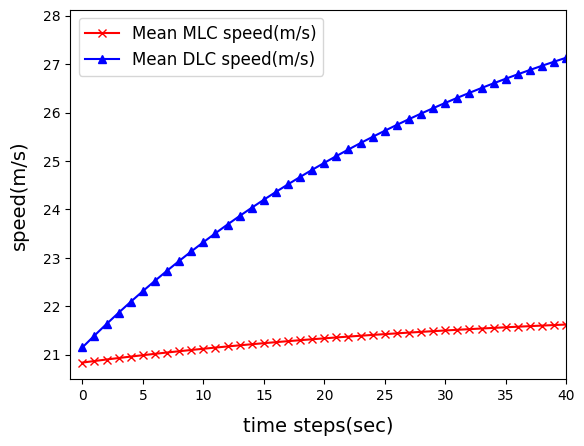

In [75]:
plt.plot(data["Time Steps(sec)"],data['Avg MLC Speed(m/s)'],  'r', linestyle='solid',label="Mean MLC speed(m/s)", marker='x')
plt.plot( data["Time Steps(sec)"],data['Avg DLC Speed(m/s)'], 'b', label="Mean DLC speed(m/s)", marker='^')
linestyle=['solid', 'dashed', 'dotted', 'dashdot']

#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}

plt.xlabel('time steps(sec)', labelpad=10, fontdict=font1)
plt.xlim([-1, 40])
#plt.ylim([20, 28])
#plt.axis([-1, 40, 20, 28])
plt.ylabel('speed(m/s)', labelpad=10, fontdict=font1)
plt.legend(fontsize=12)


plt.show()

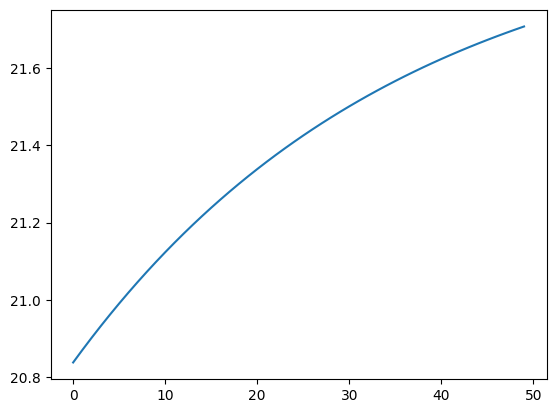

In [35]:
#pandas plot

plt.plot('Time Steps(sec)', 'Avg MLC Speed(m/s)', data=data)
plt.show()

'plt.plot([0:50,0], history[0:50,2:])\nplt.xlabel("Time StepS")\nplt.ylabel("Speed m/s")\nplt.show()'

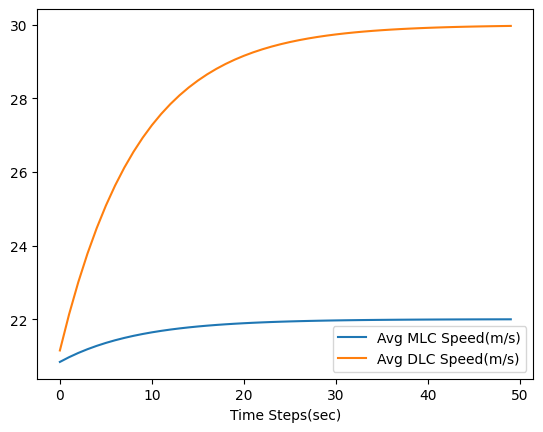

In [12]:
speed_metrics_df.plot(x="Time Steps(sec)", y=['Avg MLC Speed(m/s)', 'Avg DLC Speed(m/s)'])

## DLC Vehicles position vs MLC Vehicle positions

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
position_metrics_np = np.array(position_metrics)
print(position_metrics_np)

[[0.00000000e+00 9.06199015e+01 1.11563141e+02 ... 3.83356513e+02
  4.06842838e+02 4.28535650e+02]
 [1.00000000e+00 9.09611285e+01 1.11915880e+02 ... 3.83715131e+02
  4.07179171e+02 4.28893055e+02]
 [2.00000000e+00 9.13030621e+01 1.12272709e+02 ... 3.84077169e+02
  4.07515714e+02 4.29254422e+02]
 ...
 [1.79800000e+03 7.48970741e+02 1.00526174e+03 ... 1.27721238e+03
  1.06496363e+03 1.32240225e+03]
 [1.79900000e+03 7.49337407e+02 1.00576174e+03 ... 1.27771238e+03
  1.06533030e+03 1.32290225e+03]
 [1.80000000e+03 7.49704074e+02 1.00626174e+03 ... 1.27821238e+03
  1.06569696e+03 1.32340225e+03]]


In [7]:
time_steps = position_metrics_np[:, 0]
DLC_Vehicle1 = position_metrics_np[:, 2]
DLC_Vehicle2 = position_metrics_np[:, 4]
MLC_Vehicle1 = position_metrics_np[:, 3]
MLC_Vehicle2 = position_metrics_np[:, 5]

In [8]:
data = {'Time Steps(sec)': time_steps,
        'DLC_Vehicle1(m)': DLC_Vehicle1,
        'DLC_Vehicle2(m)': DLC_Vehicle2,
        'MLC_Vehicle1(m)': MLC_Vehicle1,
        'MLC_Vehicle2(m)': MLC_Vehicle2}
position_metrics_df = pd.DataFrame(data)

In [9]:
position_metrics_df.shape

(1801, 5)

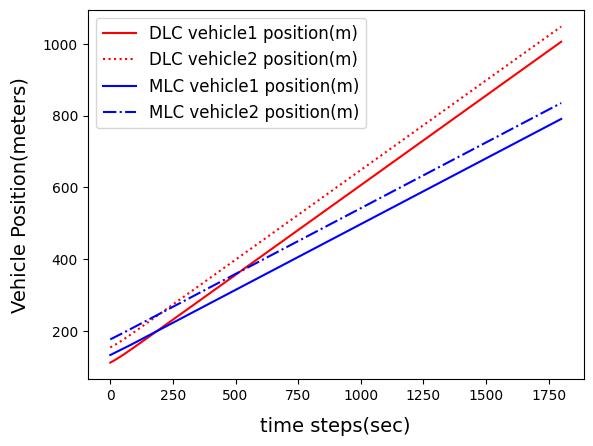

In [17]:
plt.plot(position_metrics_df["Time Steps(sec)"], position_metrics_df['DLC_Vehicle1(m)'], 'r-', label="DLC vehicle1 position(m)")
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['DLC_Vehicle2(m)'],  'r:', label="DLC vehicle2 position(m)")
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['MLC_Vehicle1(m)'],  'b-', label="MLC vehicle1 position(m)")
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['MLC_Vehicle2(m)'],  'b-.', label="MLC vehicle2 position(m)")
#linestyle=['solid', 'dashed', 'dotted', 'dashdot']

#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}

plt.xlabel('time steps(sec)', labelpad=10, fontdict=font1)
#plt.xlim([-1, 40])
#plt.ylim([20, 28])
#plt.axis([-1, 40, 20, 28])
plt.ylabel('Vehicle Position(meters)', labelpad=10, fontdict=font1)
plt.legend(fontsize=12)


plt.show()

<AxesSubplot:xlabel='Time Steps(sec)'>

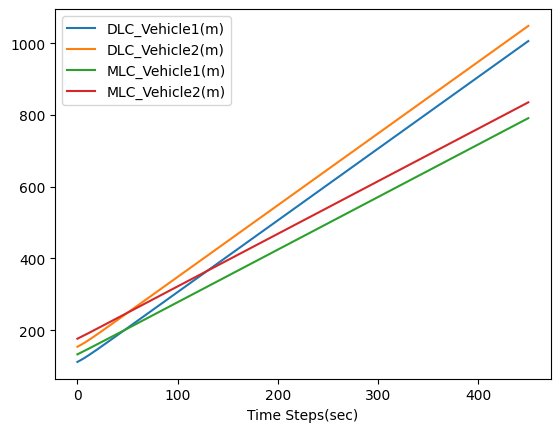

In [20]:
position_metrics_df.plot(x="Time Steps(sec)", y=['DLC_Vehicle1(m)', 'DLC_Vehicle2(m)', 'MLC_Vehicle1(m)', 'MLC_Vehicle2(m)'])

In [ ]:
avg_mlc_speed.shape
positions = numpy.array(positions)
plt.plot(positions[:1001,0], positions[:,5:9])
plt.xlabel("Time Step")
plt.ylabel("Vehicle Positions")
plt.show()

## Graph Human Vehicle Position vs DLC vehicle Position

In [18]:
import numpy as np
import pandas as pd
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#lists
position_human = []
position_dlc = []
timesteps = []

#Fill Steps
for i in range(1,51):
    timesteps.append(i)

#Highway Environment
env = gym.make('highway-v0')
env.config["lanes_count"] = 3
env.config["vehicles_count"] = 16
env.config["vehicles_density"] = 1.2
env.config["controlled_vehicles"] = 1

#TestLoop
for episode in range(1):
    obs, done = env.reset(), False
    print("episode " + str(episode + 1))
    timestep = 1
    while not done:
    #for i in range(3):
        action = 1
        obs, reward, done, info = env.step(action)
        #env.render('human')
        position_human.append([timestep, info["position"]])
        timestep += 1

#Multi Agent Highway Environment
env = gym.make('ma-highway-v0')
model = A2C.load('Training/Saved Models/best_model', env=env)

#TestLoop
for episode in trange(1, desc="Test episodes"):
    obs, done = env.reset(), False
    print("episode " + str(episode))
    timestep = 1
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        positions = info["position_metrics"]
        history = info["speed_metrics"]
        position_dlc.append([timestep, info["position_metrics"][-1][2]])
        timestep += 1
env.close()

episode 1


c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\

AttributeError: 'HighwayEnv' object has no attribute 'vehicles_speed'

In [69]:
position_human_list = np.array(position_human)
position_human_list.shape

(44, 2)

In [72]:
#convert to NumpyArray
position_human = np.array(position_human_list)

#Create Dataframe
position_df = pd.DataFrame(position_human[:,1], columns=['HumanVehicle_position'])

df2 = pd.DataFrame({'HumanVehicle_position': [0, 0,0,0,0,0]})
df2.shape
position_df = position_df.append(df2 ,ignore_index = True)
position_df['Time steps(Sec)'] = timesteps
print(position_df)

    HumanVehicle_position  Time steps(Sec)
0              113.559284                1
1              134.737694                2
2              155.549529                3
3              176.210110                4
4              196.815138                5
5              217.409889                6
6              238.014926                7
7              258.638717                8
8              279.283919                9
9              299.950496               10
10             320.637256               11
11             341.342596               12
12             362.064846               13
13             382.802416               14
14             403.553851               15
15             424.317849               16
16             445.093248               17
17             465.879019               18
18             486.674246               19
19             507.478121               20
20             528.289922               21
21             549.109010               22
22         

In [83]:
#add DLC Position Column

position_dlc_list = np.array(position_dlc)
position_df['DlcVehicle_position'] = pd.Series(position_dlc_list[:,1])
position_df.replace(0, np.nan, inplace=True)
position_df.tail()

,HumanVehicle_position,Time steps(Sec),DlcVehicle_position
45,NaN,46,NaN
46,NaN,47,NaN
47,NaN,48,NaN
48,NaN,49,NaN
49,NaN,50,NaN


<AxesSubplot:xlabel='Time steps(Sec)'>

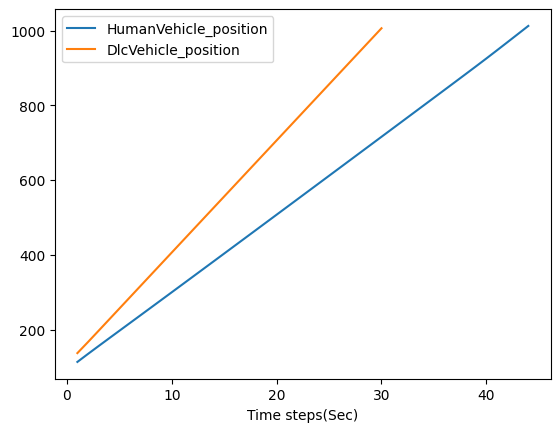

In [84]:
#Plot the graph
position_df.plot(x="Time steps(Sec)", y=["HumanVehicle_position", "DlcVehicle_position"])